In [1]:
NAME = "Robina Shaheen"
DATE = "06172020"
COLLABORATORS = ""

# Scikit-learn

Scikit-learn is a simple and efficient tools for predictive data analysis.

It is designed for machine learning in python and built on NumPy, SciPy, and matplotlib.

In this notebook I have employed Scikkit-learn to understand relationship between ozone and its precursors.

Ozone formation depends on the presence of oxide of nitrogen, carbon monoxide and volatile organic compounds.

However, VOC's are not measured at all the stations and few stations have values measured for half of the year. 
These msissing values cannot be predicted or filled due to spatial variability of its sources. 


In [2]:
# Import packages/ modules
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import earthpy as et
import matplotlib.pyplot as plt  
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import datetime
from textwrap import wrap
from statsmodels.formula.api import ols

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Scikit learn to train model and make predictions.
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics


# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")
%matplotlib inline

In [3]:
# Conditional statement to check and set working directory. 
ea_path = os.path.join(et.io.HOME, 'earth-analytics')

if os.path.exists(ea_path):
    os.chdir(ea_path)
    print("working directory is set to earth-analytics") 
else:     
    print("This path does not exist")
    
# Set base path to download data 
base_path = os.path.join(ea_path, "data")
base_path

working directory is set to earth-analytics


'C:\\Users\\bina_\\earth-analytics\\data'

In [4]:
file_path21 = os.path.join(base_path,"output_figures","sandiego_2014_fires", "air_quality_csv",                     
                         "sd_chemical_composition_2014_mean_v02.csv")

# To check if path is created
os.path.exists(file_path21)

True

In [5]:
sd_atm_df = pd.read_csv(file_path21, parse_dates=['Date Local'],
                                index_col=['Date Local'])
sd_atm_df.head(2)
sd_atm_df.columns

Index(['O3_ppm_mean', 'O3 (ppb)', 'NO2 (ppb)', 'PM2.5 (ug/m3)', 'CO_ppm',
       'CO (ppb)'],
      dtype='object')

In [6]:
sd_atm_df.shape

(365, 6)

In [7]:
sd_atm_df.describe()

,O3_ppm_mean,O3 (ppb),NO2 (ppb),PM2.5 (ug/m3),CO_ppm,CO (ppb)
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,0.030693,30.693122,10.490526,10.493389,0.403001,403.001442
std,0.006991,6.990947,6.042576,4.754778,0.189696,189.696481
min,0.011977,11.977000,2.655821,2.066667,0.153409,153.409000
25%,0.025705,25.704818,5.732708,7.730729,0.260755,260.754833
50%,0.030571,30.571100,8.517046,10.026191,0.344201,344.200500
75%,0.035479,35.478700,13.773292,12.513799,0.512228,512.228500
max,0.052010,52.010000,32.668723,60.135417,1.017736,1017.736333


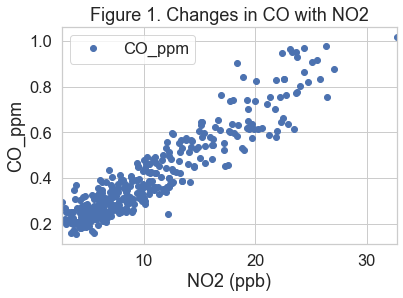

In [8]:
sd_atm_df.plot(x='NO2 (ppb)', y='CO_ppm', style='o', c='b')
plt.title('Figure 1. Changes in CO with NO2')  
plt.xlabel('NO2 (ppb)')  
plt.ylabel('CO_ppm')  
plt.show()

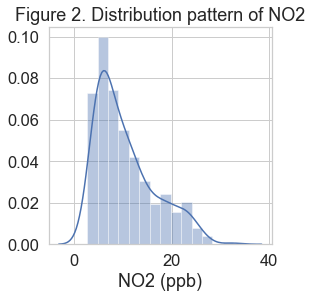

In [9]:
plt.figure(figsize=(4,4))
sns.distplot(sd_atm_df['NO2 (ppb)'], color = 'b')
plt.title('Figure 2. Distribution pattern of NO2')
plt.show()
# plt.tight_layout()

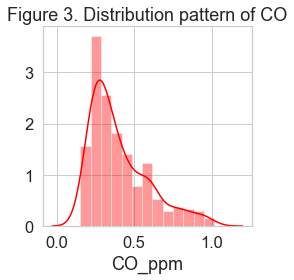

In [10]:
plt.figure(figsize=(4,4))
sns.distplot(sd_atm_df['CO_ppm'], color = 'red')
plt.title('Figure 3. Distribution pattern of CO')
plt.tight_layout()

Our next step is to divide the data into “attributes” and “labels”.
Attributes are the independent variables while labels are dependent variables whose values are to be predicted. In our dataset, we only have two columns. We want to predict the MaxTemp depending upon the MinTemp recorded. Therefore our attribute set will consist of the “MinTemp” column which is stored in the X variable, and the label will be the “MaxTemp” column which is stored in y variable.

In [11]:
X = sd_atm_df['NO2 (ppb)'].values.reshape(-1,1)
y = sd_atm_df['CO_ppm'].values.reshape(-1,1)

Next, we split 80% of the data to the training set while 20% of the data to test set using below code.
The test_size variable is where we actually specify the proportion of the test set.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

After splitting the data into training and testing sets, finally, the time is to train our algorithm. 

For that, we need to import LinearRegression class, instantiate it, 
and call the fit() method along with our training data.

As we have discussed that the linear regression model basically finds the best value for the intercept and slope, which results in a line that best fits the data. To see the value of the intercept and slope calculated by the linear regression algorithm for our dataset, execute the following code.

In [13]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[0.09713389]
[[0.0292762]]


This means that for every one unit of change in NO2_mean, the change in the CO is about 0.029%.
Now that we have trained our algorithm, it’s time to make some predictions. To do so, we will use our test data and see how accurately our algorithm predicts the percentage score. To make predictions on the test data, execute the following script:

In [15]:
y_pred = regressor.predict(X_test)

Now compare the actual output values for X_test with the predicted values, execute the following script:

In [16]:
# Taking 20% data for CO and NO2 only
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df.head()

,Actual,Predicted
0,0.298769,0.274035
1,0.299539,0.344760
2,0.764370,0.764263
3,0.424460,0.474668
4,0.400365,0.457575


We can also visualize comparison result as a bar graph using the below script :
Note: As the number of records is huge, for representation purpose I’m taking just 15 records.

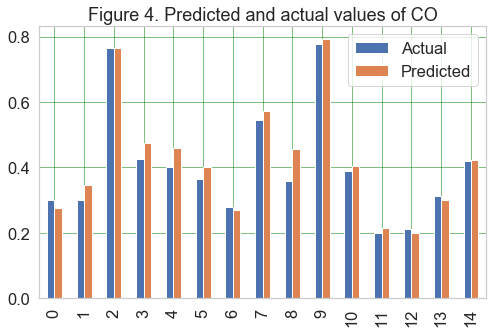

In [17]:
df1 = df.head(15)
df1.plot(kind='bar',figsize=(8,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
# plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Figure 4. Predicted and actual values of CO')
plt.show()

This model seems to work well as the predicted percentages are within the error limits for the actual ones.
The overall variation was not high as all 10 monitoring station were averaged. 

The O3 formation and dissociation is complex process and depends on many parameters and hence changes in these variables will also affect ozone concentration at photochemical equilibrium.

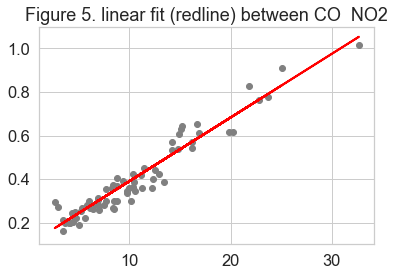

In [18]:
# plotting straight line with the test data.
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Figure 5. linear fit (redline) between CO  NO2')
plt.show()

# Statistical Analysis (One Variable)

The straight line in the above graph shows our algorithm is correct.

The final step is to evaluate the performance of the algorithm. 
This step is particularly important to compare how well different algorithms perform on a particular dataset. For regression algorithms, three evaluation metrics are commonly used:

1. Mean Absolute Error (MAE) is the mean of the absolute value of the errors. It is calculated as:
    
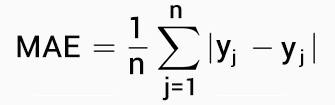


2. Mean Squared Error (MSE) is the mean of the squared errors and is calculated as:

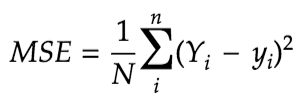

3. Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

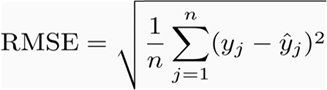

Luckily, we don’t have to perform these calculations manually. The Scikit-Learn library comes with pre-built functions that can be used to find out these values for us.
Let’s find the values for these metrics using our test data.


In [19]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.03790606258368175
Mean Squared Error: 0.0023326923930414834
Root Mean Squared Error: 0.04829795433599112


## Conclusion for Single Variable Analysis

All these values are excellent, indicative of an excellent fit of model.

# Multiple Linear Regression (Final Test)

## Holy grail in atmospheric chemistry: ozone prediction in the urban environment.


The linear regression in the above section between CO and NO2 involved one variable. 
Now actual test is to understand ozone formation in the urban environment where multiple players are in action. 


In real-world Ozone formation and release of pllutants and atmospheric conditions show large variations and hence we need to include more than two variables using Multiple Linear Regression.


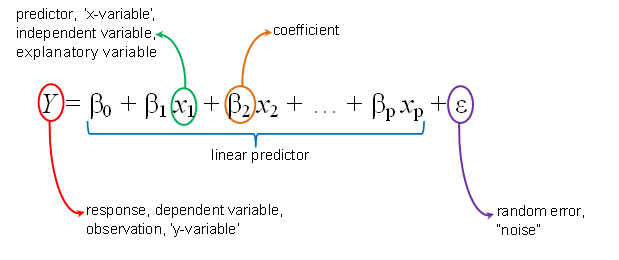


Linear regression involving multiple variables is called “multiple linear regression” or multivariate linear regression. The steps to perform multiple linear regression are almost similar to that of simple linear regression. 

The difference lies in the evaluation. We can use it to find out which factor has the highest impact on the predicted output and how different variables relate to each other.

In [20]:
# To check empty columns, False means no empty colums
sd_atm_df.isnull().any()

O3_ppm_mean      False
O3 (ppb)         False
NO2 (ppb)        False
PM2.5 (ug/m3)    False
CO_ppm           False
CO (ppb)         False
dtype: bool

Once the above code is executed, all the columns should give False, 
In case for any column you find True result, then remove all the null values from that column using below code.

In [21]:
sd_atm_df = sd_atm_df.fillna(method='ffill')

Our next step is to divide the data into “attributes” and “labels”. 

X variable contains all the attributes/features and y variable contains labels.

In [22]:
X = sd_atm_df[[ 'NO2 (ppb)','CO_ppm', 'PM2.5 (ug/m3)']].values
y = sd_atm_df['O3 (ppb)'].values

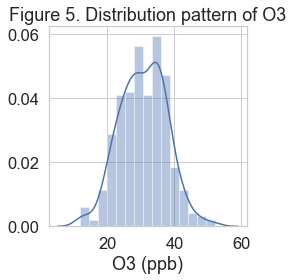

In [23]:
plt.figure(figsize=(4,4))
plt.title('Figure 5. Distribution pattern of O3')
sns.distplot(sd_atm_df['O3 (ppb)'])
plt.tight_layout()

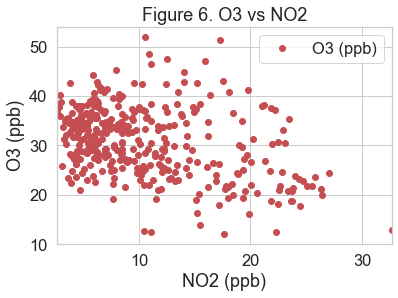

In [24]:
sd_atm_df.plot(x='NO2 (ppb)', y='O3 (ppb)', style='o', c='r')  
plt.title('Figure 6. O3 vs NO2')  
plt.xlabel('NO2 (ppb)')  
plt.ylabel('O3 (ppb)')  
plt.show()

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
# Training Algorithm
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

33.395895011457256
[-0.4457463  -0.79214025  0.20259138]


In [28]:
y_pred = regressor.predict(X_test)
# print(y_pred)

In [29]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2.head()

,Actual,Predicted
0,39.496778,33.963768
1,29.229364,31.405086
2,24.700636,25.743098
3,23.405000,29.826982
4,37.794300,30.561945


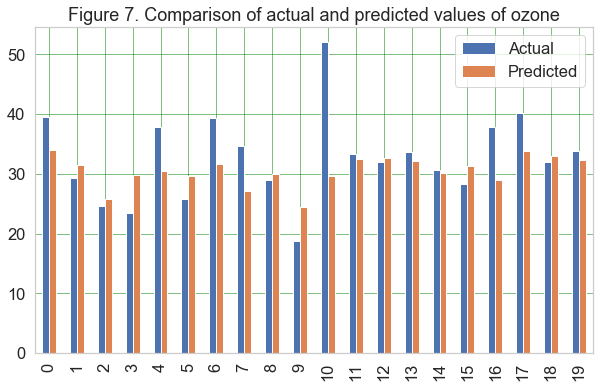

In [30]:
# printing only 20% values
df2 = df2.head(20)
df2.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Figure 7. Comparison of actual and predicted values of ozone')
plt.show()

In [31]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.175979035211536
Mean Squared Error: 42.42135163302012
Root Mean Squared Error: 6.513167557572899


Mean O3 (ppb) = 30.693
RMSE = 6.51

# Conclusion:
The ozone prediction from model = (6.51/30.69)*100 ~ 20% less than actual value. still reasonable model fit. 

Taking wildfire days out will improve the relationship between normal parameters and hence MLR coefficents.

If we separate inland vs coastal, RMSE will reduce significantly. 

the O3 fromation depends on temp, pressure and destruction with OH radical, photolysis and collisons with air moleucles.  The data for one of the important source of ozone formation VOC is incomplete and it can signficntly brings predicted values in alignment with the observed one.
